<a href="https://colab.research.google.com/github/NTsering/Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import optimizers

Using TensorFlow backend.


In [0]:
# from google.colab import drive
# #Path to dataset: https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv 
# drive.mount('/content/drive')

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# import random
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def load_dataset(path):
  dataset = pd.read_csv(path,sep = '\t', header = 0)
  dataset = dataset.loc[:, 'Phrase':'Sentiment']
  return dataset

In [0]:
# path = '/content/drive/My Drive/NLP/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset-master/train.tsv'
path = "https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv"
dataset = load_dataset(path)

In [6]:
dataset.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [7]:
dataset.shape

(156060, 2)

In [0]:
def visualize_dataset(dataset):
  dataset.hist(bins=20, figsize=(15,5), layout=(1,3))
  plt.show()

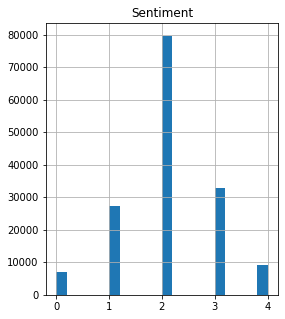

In [9]:
visualize_dataset(dataset)

In [10]:
documents = dataset.values.tolist()
print('Phrase: ',documents[0][0],'\nSentiment: ',documents[0][1])

Phrase:  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . 
Sentiment:  1


In [9]:
# print('Type', type(documents))
# print(len(documents))

Type <class 'list'>
156060


In [0]:
def preprocess_dataset(documents):
  porter = PorterStemmer()
  lancaster = LancasterStemmer()

  wordnet_lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  punctuations = '-\'?:!.,;\"()'

  remove_stopwords = True
  useStemming = False
  useLemma = True
  removePuncs = True

  for l in range(len(documents)):
    label = documents[l][1]
    tempReview = []
    for w in documents[l][0].split(' '):
      newWord = w
      if remove_stopwords and (w in stop_words):
        continue
      if removePuncs and (w in punctuations):
        continue
      if useStemming:
        newWord = porter.stem(newWord)
      if useLemma:
        newWord = wordnet_lemmatizer.lemmatize(newWord)
      tempReview.append(newWord)

      documents[l] = (' '.join(tempReview), label)
  return documents

In [0]:
documents = preprocess_dataset(documents)
# print(documents[200:210])

In [0]:
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range= (1,1))
all_data = pd.DataFrame(documents, columns=['Phrase', 'Sentiment'])

In [0]:
X = vectorizer.fit_transform(all_data['Phrase'])
x_train, x_test, y_train, y_test = train_test_split(all_data['Phrase'], all_data['Sentiment'], train_size = 0.7, shuffle = True, random_state = 2003, stratify = all_data['Sentiment'])

In [17]:
print(x_train.shape, x_test.shape)

(109242,) (46818,)


In [0]:
X = vectorizer.fit_transform(all_data['Phrase'])
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [19]:
print(X.shape, x_train.shape, x_test.shape)

(156060, 10773) (109242, 10773) (46818, 10773)


In [0]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000, n_iter=16, random_state=42)
X_reduced = svd.fit_transform(X)

In [21]:
X_reduced.shape

(156060, 1000)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_reduced, all_data['Sentiment'], train_size = 0.7, shuffle = True, random_state = 2003, stratify = all_data['Sentiment'])

In [23]:
print(x_train.shape, y_train.shape)

(109242, 1000) (109242,)


In [0]:
y_train_np = to_categorical(y_train)
y_test_np = to_categorical(y_test)

Differrence 

In [15]:
all_data.shape
# vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range= (1,1), max_features=5000)

(156060, 2)

In [0]:
# vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range= (1,1), max_features=5000)
all_data = pd.DataFrame(documents, columns=['Phrase', 'Sentiment'])
x_train, x_test, y_train, y_test = train_test_split(all_data['Phrase'], all_data['Sentiment'], train_size = 0.7, shuffle = True, random_state = 2003, stratify = all_data['Sentiment'])

In [0]:
X = vectorizer.fit_transform(all_data['Phrase'])
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [17]:
print(x_train.shape, x_test.shape)

(109242, 5000) (46818, 5000)


In [0]:
x_train_np = x_train.toarray()
y_train_np = to_categorical(y_train)

x_test_np = x_test.toarray()
y_test_np = to_categorical(y_test)

Difference

In [0]:
x_train_final = np.expand_dims(x_train, axis=2)
x_test_final = np.expand_dims(x_test, axis=2)

In [26]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(109242, 1000) (109242,) (46818, 1000) (46818,)


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, AveragePooling1D

model = Sequential()
model.add(Conv1D(filters = 128, kernel_size=1, activation='relu', input_shape=(x_train.shape[1],1)))
model.add(Conv1D(filters = 128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Conv1D(filters = 128, kernel_size=1, activation='relu'))
model.add(AveragePooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1000, 128)         256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1000, 128)         16512     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 128)          16512     
_________________________________________________________________
average_pooling1d_1 (Average (None, 250, 128)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)              

In [29]:
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
epochs = 30
# rms = optimizers.RMSprop(lr=0.001, rho=0.9)
# nadam = optimizers.Nadam(lr = 0.01, beta_1=0.9, beta_2=0.999)
adamax = optimizers.Adamax(lr = 0.01, beta_1=0.9, beta_2=0.999, decay = 0.001)
# adam = optimizers.Adam(lr = 0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, decay = 0.001 )
model.compile(optimizer=adamax, loss='categorical_crossentropy', metrics=['acc'])

In [30]:
# history = model.fit(x_train_final, y_train_np, validation_data=(x_test_final, y_test_np), epochs= epochs, batch_size = 128)
history = model.fit(x_train_final, y_train_np, epochs= epochs, batch_size = 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 109242 samples, validate on 46818 samples
Epoch 1/30





109242/109242 [==============================] - 57s 526us/step - loss: 1.1884 - acc: 0.5294 - val_loss: 1.1234 - val_acc: 0.5516
Epoch 2/30
109242/109242 [==============================] - 44s 406us/step - loss: 1.0895 - acc: 0.5663 - val_loss: 1.0775 - val_acc: 0.5702
Epoch 3/30
109242/109242 [==============================] - 45s 407us/step - loss: 1.0416 - acc: 0.5865 - val_loss: 1.0481 - val_acc: 0.5836
Epoch 4/30
109242/109242 [==============================] - 45s 408us/step - loss: 1.0051 - acc: 0.6022 - val_loss: 1.0446 - val_acc: 0.5882
Epoch 5/30
109242/109242 [==============================] - 44s 407us/step - loss: 0.9774 - acc: 0.6138 - val_loss: 1.0253 - val_acc: 0.5933
Epoch 6/30
109242/109242 [==============================] - 44s 407us/step - loss: 0.9517 - acc: 0.6261 - val_loss: 1.0136 - val_acc: 0.5983
E

In [56]:
print('Avg Accuracy:\t', (np.mean(history.history['acc'])))
print('Avg Loss:\t', np.mean(history.history['loss']))

Avg Accuracy:	 0.6630926444645568
Avg Loss:	 0.8568989948582314


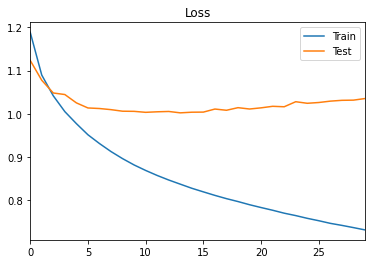

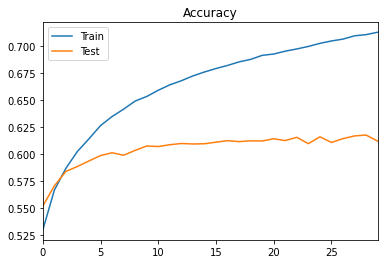

In [31]:
history_df = pd.DataFrame(history.history)
ax = history_df[['loss', 'val_loss']].plot(title = "Loss")
ax.legend(["Train", "Test"]);
ax = history_df[['acc', 'val_acc']].plot(title = "Accuracy")
ax.legend(['Train', 'Test'])

In [32]:
print(history)

In [46]:
matrices = model.evaluate(x = x_test_final, y = y_test_np)

46818/46818 [==============================] - 8s 172us/step


In [57]:
print('Test Loss:\t', matrices[0], '\nTest Accuracy:\t', matrices[1])

Test Loss:	 1.0352985733795605 
Test Accuracy:	 0.6116878123798539


In [0]:
model.save('11043771dconv_cal.h5')